# Exploratory Data Analysis

Here will will explore various views of our Yelp_Api data in order to discover insights about our two food types in each region.

To begin, we import the CSV file we saved from the previous yelp_api script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
df = pd.read_csv("yelp_master_data.csv")

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.category.value_counts().plot(kind='bar')
plt.title('Total Restaurants In the Survey')

In [ ]:
df[(df.city =='chicago') & (df.category == 'vegan')].price.sum()/df[(df.city =='chicago') & (df.category == 'vegan')]['Unnamed: 0'].max()



In [ ]:
df[(df.city =='minneapolis') & (df.category == 'steak')].price.sum()/df[(df.city =='minneapolis') & (df.category == 'steak')]['Unnamed: 0'].max()




In [ ]:
df[(df.city =='chicago') & (df.category == 'vegan')].price.sum()

In [ ]:
sns.distplot(df[(df.city =='chicago') & (df.category == 'steak')].price, hist=True)
sns.distplot(df[(df.city =='chicago') & (df.category == 'vegan')].price, hist=True)

# Summary Analysis

We create a new DataFrame with just summary statistics to allow us to see quick comparisons by city.

### Population of matching 40km radius

In [18]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'Miami':3140501, 
'Tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215}

In [4]:
# creating a new dataframed named cities_df
cities = ['portland','los angeles','new york','boston','chicago','austin','miami','tulsa','minneapolis','san diego']


In [5]:
def get_number_of_restaurants(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].shape[0]

In [6]:
# create a function that sums price per city per category: vegan, steak
def get_sum(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].price.sum()

In [27]:
cities_df = pd.DataFrame({'city':cities},)

#adding vegan_count column to cities_df dataframe
cities_df['veg_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'vegan') )

#adding steak_count column to cities_df dataframe
cities_df['steak_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'steak') )

# adding a population column to cities_df dataframe
cities_df['pop'] = [float(x) for x in list(pop.values())]

# adding a per capita column to cities_df dataframe to give steak restaurants per capita per city
cities_df['steak_capita'] = cities_df['steak_count'] / cities_df['pop']
cities_df['veg_capita'] = cities_df['veg_count'] / cities_df['pop']

cities_df['steak_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/cities_df['steak_count']
cities_df['veg_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']

# adding price sum column per city for steak restaurants
cities_df['steak_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/ cities_df['steak_count']
cities_df['veg_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']


# adding longitude and latitude to cities_df dataframe
cities_df['latitude'] = df.latitude
cities_df['longitude'] = df.longitude

#setting the index to the city
cities_df.set_index('city', drop=True, inplace=True)

In [29]:
cities_df

,veg_count,steak_count,pop,steak_capita,veg_capita,steak_rating_mean,veg_rating_mean,steak_$mean,veg_$mean,latitude,longitude
city,,,,,,,,,,,
portland,102,30,1907395.0,0.000016,0.000053,2.551724,1.505747,2.551724,1.505747,40.714153,-73.990425
los angeles,137,68,10055380.0,0.000007,0.000014,2.758065,1.678261,2.758065,1.678261,40.726740,-73.987220
new york,238,243,13409590.0,0.000018,0.000018,2.853333,1.905941,2.853333,1.905941,40.720428,-74.000203
boston,36,47,3342667.0,0.000014,0.000011,2.613636,1.750000,2.613636,1.750000,40.722311,-73.997377
chicago,56,97,6377851.0,0.000015,0.000009,2.802198,1.607843,2.802198,1.607843,40.725371,-73.987617
austin,53,31,1142575.0,0.000027,0.000046,2.700000,1.534884,2.700000,1.534884,40.713854,-73.998948
miami,32,73,3140501.0,0.000023,0.000010,2.303030,1.720000,2.303030,1.720000,40.723780,-73.988490
tulsa,5,33,757571.0,0.000044,0.000007,2.366667,1.333333,2.366667,1.333333,40.720310,-73.993050
minneapolis,16,27,2648228.0,0.000010,0.000006,2.680000,1.727273,2.680000,1.727273,40.714064,-73.987465


In [ ]:
cities_df = pd.DataFrame.from_dict(pop, orient='index')

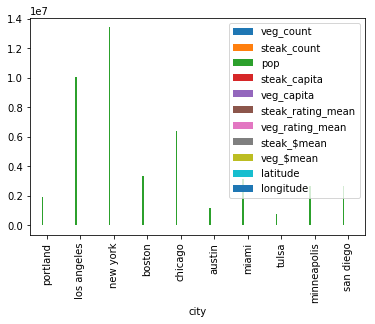

In [30]:
cities_df.plot.bar()

In [ ]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'miami':3140501, 
'tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215}

two sample Z test